### Linear Correlation Coefficient

Correlation Coefficient measures the extent to which two sets of data are linearly related . 

It's values range from  -1 to 1

A postive correlation mean two data sets are direcly related , meaning as values in set A increases we expect values in set B to increase .

Negative correlation means values in a data set are inversely related .

A correlation of  0 , means two data sets are random and cannot be described linearly .y




In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tickers = [ 'NVDA' ,  'TSM' , 'SPY']

df = yf.download(tickers, start= '2023-01-01' , end= '2024-08-01' )['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [3]:
df.head(3)

Ticker,NVDA,SPY,TSM
Date,,,
2023-01-03,14.306805,372.754242,72.097382
2023-01-04,14.740557,375.631989,74.327606
2023-01-05,14.256835,371.344727,73.753006


Correlation between NVDA and TSM:  0.9766554357835092
Correlation between NVDA and SPY:  0.963948989433867
Correlation between TSM and SPY  : 0.975816724094651


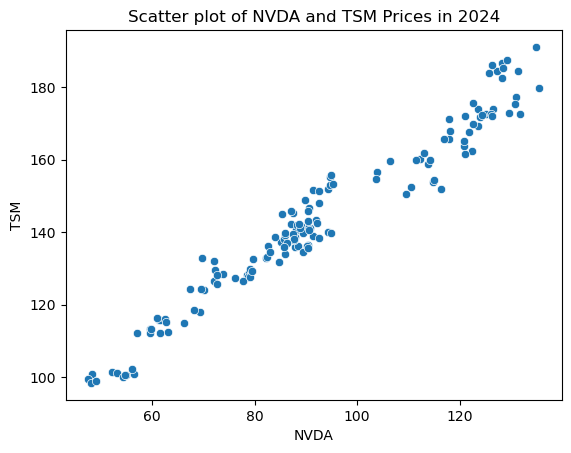

In [4]:
"""

Understanding if two assets are related can be useful in portfolio construction.

"""

df_in_2024 = df[ df.index > '2024-01-01']

fig , axis = plt.subplots() 

axis = sns.scatterplot( x = 'NVDA' ,  y = 'TSM' ,  data = df_in_2024 )

axis.set_title( 'Scatter plot of NVDA and TSM Prices in 2024' )

axis.set_xlabel( 'NVDA' )
axis.set_ylabel( 'TSM' )

print( 'Correlation between NVDA and TSM: ' , df_in_2024[ 'NVDA' ].corr( df_in_2024[ 'TSM' ]))
print( 'Correlation between NVDA and SPY: ' , df_in_2024[ 'NVDA' ].corr( df_in_2024[ 'SPY' ]))
print('Correlation between TSM and SPY  :' ,  df_in_2024['TSM'].corr( df_in_2024['SPY']))

plt.show()


### Big problem with correlation in asset prices

We notice the correlation between NVDA and TSM is high and they both have very high correlation with the overall market( S&P 500).
This presents a very big problem in any set of assets , it is very easy to handpick a certain time period to support an hypothesis .
It might be move useful to see the correlation over time period 

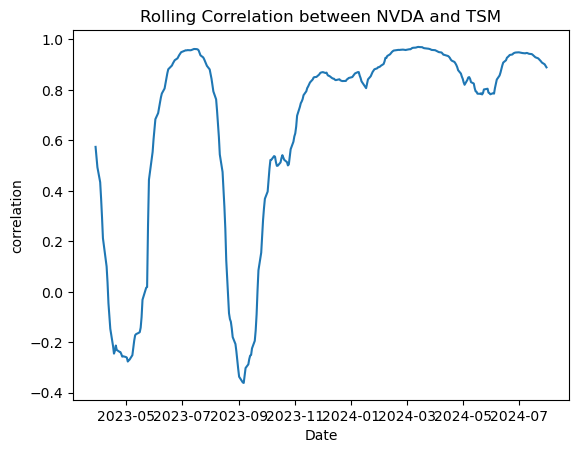

In [5]:
rolling_corr = df['NVDA'].rolling(window = 60).corr( df['TSM'] )


plt.plot(rolling_corr.index , rolling_corr)


plt.title( 'Rolling Correlation between NVDA and TSM' )

plt.xlabel( 'Date' )

plt.ylabel( 'correlation')

plt.show()


We can see these two assets where not always directly correlated

In portfolio contruction , it would be considered better to have multiple uncorrelated assets .

The thinking behind that is if two assets are uncorrelated , a decline in price of an asset would not mean a decline in another .

The would allow for a stable stream and a safer portfolio

## Limitations of Correlation Analysis

While correlation is a powerful and widely used statistical tool, it's important to understand its limitations to avoid misinterpretation of results.

### Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance:

1. Lagged Relationships: One variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation.

2. Rate of Change: A variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.



Correlation between x and y:  -0.07589466694797199


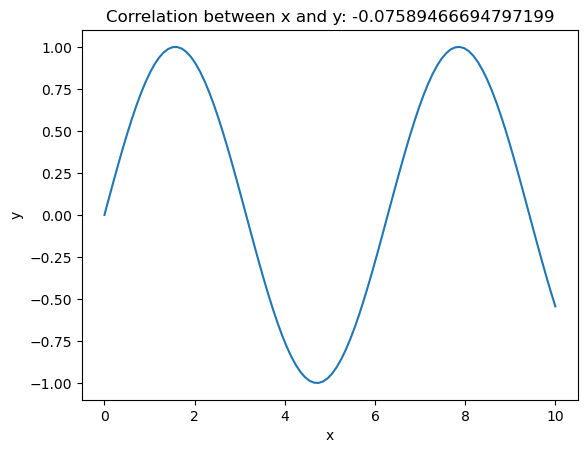

In [6]:
x  =  np.linspace( 0 ,  10 ,  100 )

y = np.sin(x)

correlation  =  np.corrcoef(x, y)[0 ,1]

print( 'Correlation between x and y: ' , correlation)

plt.plot(x, y)
plt.title( 'Correlation between x and y: ' + str(correlation))

plt.xlabel( 'x')
plt.ylabel( 'y')

plt.show()



In this example, despite a clear relationship between x and y (a sine wave), the correlation coefficient is close to zero.

### Correlation does not imply causation

Just because two variables are correlated does not mean that one causes the other. 

### Sensitivity to Outliers

The correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

In [7]:
x =  np.random.rand(100)

y = np.random.rand(100)

y = 2*x + np.random.normal(0, 0.1, 100)
y[0] = 10  # Add an outlier


corr_with_outlier = np.corrcoef(x, y)[0, 1]
corr_without_outlier = np.corrcoef(x[1:], y[1:])[0, 1]

print(f"Correlation with outlier: {corr_with_outlier:.2f}")
print(f"Correlation without outlier: {corr_without_outlier:.2f}")

Correlation with outlier: 0.59
Correlation without outlier: 0.99


The standard interpretation of the correlation coefficient assumes that the variables are normally distributed. If this assumption is violated, the interpretation may not be valid.


it is a good idea to use correlation with caution and use in conjunction with other statistical techniques